# Descriptive Analysis in Python

---

Today we are going to use the NYC Vehicle Collisions 'accidents.csv' dataset from:
https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Remember, in order to upload a csv to Goolge Colab, you can first download it to you own machine with the following code: 

1. `!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv`
2. **In Colab, click on the little arrow on the left-hand side of the screen,**

<div> 
    <img src="attachment:Colab%201.png" width=600 />
</div>

3. **Click on "Files" and then "Upload" to upload the .csv file,**

<div>
    <img src ="attachment:Colab%203.png" width=600 /> 
    <img src="attachment:Colab%202.png" width=600 />
</div>

4. **Select ".csv" and click "open".**

In [2]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  353M    0  353M    0     0  4488k      0 --:--:--  0:01:20 --:--:-- 4795k


Now that we have our CSV uploaded into our Colab environment, we can 'read it in' using `pd.read_csv`

---

In [3]:
import pandas as pd

df = pd.read_csv("./accidents.csv",low_memory=False)

# low_memory means we want to read in our full data set 

%matplotlib inline

In [4]:
pd.options.display.max_columns = 100

In [5]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/13/2020,13:20,QUEENS,11004,0.000000,0.000000,"(0.0, 0.0)",NaN,NaN,81-23 262 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347343,NaN,NaN,NaN,NaN,NaN
1,09/12/2020,18:23,NaN,NaN,NaN,NaN,NaN,102 CROSS DRIVE,EAST DRIVE,NaN,2.0,0.0,1,0,1,0,0,0,Driver Inexperience,NaN,NaN,NaN,NaN,4347479,Bike,NaN,NaN,NaN,NaN
2,09/12/2020,22:00,NaN,NaN,40.819378,-73.960350,"(40.819378, -73.96035)",HENRY HUDSON PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347290,Sedan,NaN,NaN,NaN,NaN
3,09/11/2020,0:16,BRONX,10463,40.879555,-73.904335,"(40.879555, -73.904335)",NaN,NaN,5600 BROADWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4346740,Sedan,NaN,NaN,NaN,NaN
4,09/10/2020,10:26,BRONX,10455,40.818157,-73.906250,"(40.818157, -73.90625)",FOREST AVENUE,EAST 156 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4346697,Sedan,Sedan,NaN,NaN,NaN


# Data Types

Remember, Python is an object oriented programming language, meaning we can do different things to different objects. But how Python perceives our data (as a string, an integer, a float, a Boolean, a datetime value, et. cetera) deterimnes what we can do with our data. 

For instance, I can't take the average of a list of strings. So, let's use `df.dtypes` to see how Python is interpreting our data.

In [6]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

It looks like our date and time columns are being read in as strings, not as datetimes, so let's adjust:

In [8]:
df['DATETIME'] = df['CRASH DATE'] + ' ' + df['CRASH TIME'] # let's create a new column called DATETIME...
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M") # ...and convert it to datetime format

In [9]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATETIME
0,09/13/2020,13:20,QUEENS,11004,0.000000,0.000000,"(0.0, 0.0)",NaN,NaN,81-23 262 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347343,NaN,NaN,NaN,NaN,NaN,2020-09-13 13:20:00
1,09/12/2020,18:23,NaN,NaN,NaN,NaN,NaN,102 CROSS DRIVE,EAST DRIVE,NaN,2.0,0.0,1,0,1,0,0,0,Driver Inexperience,NaN,NaN,NaN,NaN,4347479,Bike,NaN,NaN,NaN,NaN,2020-09-12 18:23:00
2,09/12/2020,22:00,NaN,NaN,40.819378,-73.960350,"(40.819378, -73.96035)",HENRY HUDSON PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347290,Sedan,NaN,NaN,NaN,NaN,2020-09-12 22:00:00
3,09/11/2020,0:16,BRONX,10463,40.879555,-73.904335,"(40.879555, -73.904335)",NaN,NaN,5600 BROADWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4346740,Sedan,NaN,NaN,NaN,NaN,2020-09-11 00:16:00
4,09/10/2020,10:26,BRONX,10455,40.818157,-73.906250,"(40.818157, -73.90625)",FOREST AVENUE,EAST 156 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4346697,Sedan,Sedan,NaN,NaN,NaN,2020-09-10 10:26:00


In [10]:
df.dtypes

CRASH DATE                               object
CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

We can also convert our original 'DATE' and 'TIME' columns to datetime format:

In [14]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format="%H:%M")

In [15]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format="%m/%d/%Y")

In [16]:
df.dtypes

CRASH DATE                       datetime64[ns]
CRASH TIME                       datetime64[ns]
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

# Engineering New Columns

Now, let's create a new column called "INJURY" and another called "DEATH" that only holds a True value if there was at least one injury or death in the incident:

In [17]:
df['INJURY'] = (df['NUMBER OF PERSONS INJURED']>0)
df['DEATH'] = (df['NUMBER OF PERSONS KILLED']>0)

In [18]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATETIME,INJURY,DEATH
0,2020-09-13,1900-01-01 13:20:00,QUEENS,11004,0.000000,0.000000,"(0.0, 0.0)",NaN,NaN,81-23 262 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347343,NaN,NaN,NaN,NaN,NaN,2020-09-13 13:20:00,False,False
1,2020-09-12,1900-01-01 18:23:00,NaN,NaN,NaN,NaN,NaN,102 CROSS DRIVE,EAST DRIVE,NaN,2.0,0.0,1,0,1,0,0,0,Driver Inexperience,NaN,NaN,NaN,NaN,4347479,Bike,NaN,NaN,NaN,NaN,2020-09-12 18:23:00,True,False
2,2020-09-12,1900-01-01 22:00:00,NaN,NaN,40.819378,-73.960350,"(40.819378, -73.96035)",HENRY HUDSON PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4347290,Sedan,NaN,NaN,NaN,NaN,2020-09-12 22:00:00,False,False
3,2020-09-11,1900-01-01 00:16:00,BRONX,10463,40.879555,-73.904335,"(40.879555, -73.904335)",NaN,NaN,5600 BROADWAY,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4346740,Sedan,NaN,NaN,NaN,NaN,2020-09-11 00:16:00,False,False
4,2020-09-10,1900-01-01 10:26:00,BRONX,10455,40.818157,-73.906250,"(40.818157, -73.90625)",FOREST AVENUE,EAST 156 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4346697,Sedan,Sedan,NaN,NaN,NaN,2020-09-10 10:26:00,False,False


---

# Exercise 1: What is the most common contributing factor to collisions?

In [ ]:
# your code here

# Solution

In [21]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                       617503
Driver Inattention/Distraction    325831
Failure to Yield Right-of-Way      98310
Following Too Closely              87538
Backing Unsafely                   65473
                                   ...  
Shoulders Defective/Improper          75
Windshield Inadequate                 69
Texting                               37
Listening/Using Headphones            18
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

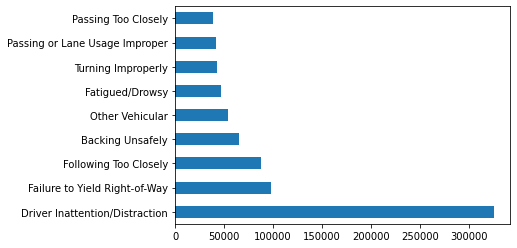

In [19]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

# Exercise 2: Break down the number of collisions by borough

In [ ]:
# your code here

# Solution

In [22]:
df['BOROUGH'].value_counts()

BROOKLYN         371118
QUEENS           317971
MANHATTAN        279738
BRONX            168857
STATEN ISLAND     50506
Name: BOROUGH, dtype: int64

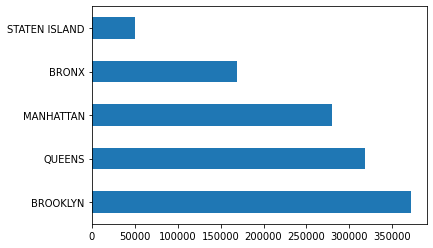

In [23]:
df['BOROUGH'].value_counts().plot(kind='barh')

---

# Basic Data Viz / Plotting

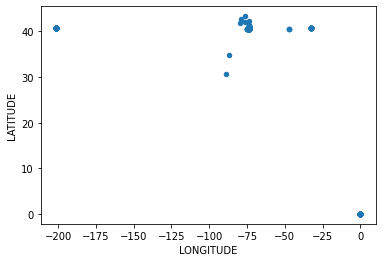

In [24]:
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

Immediately we see there are some erronenous values here. I don't think there were any accidents in NYC at longitude 0, latitude 40 (especially because that is somewhere in Spain, according to Google). 

So let's use what's known as a 'Mask' – a selection condition that only keeps the entries we determine to be valid.

Another quick Google search tells us that the lat/long for NYC is between 40/41 and -72/-74.5, so let's use that.

In [25]:
clean_mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)

cleandf = df[clean_mask]

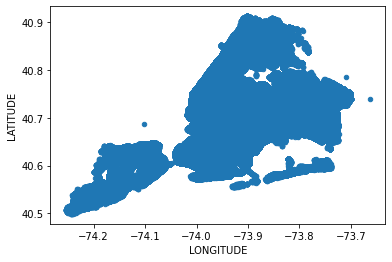

In [26]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')

Much better. Let's increase the figuresize a bit, too, just for ease of viewing. 

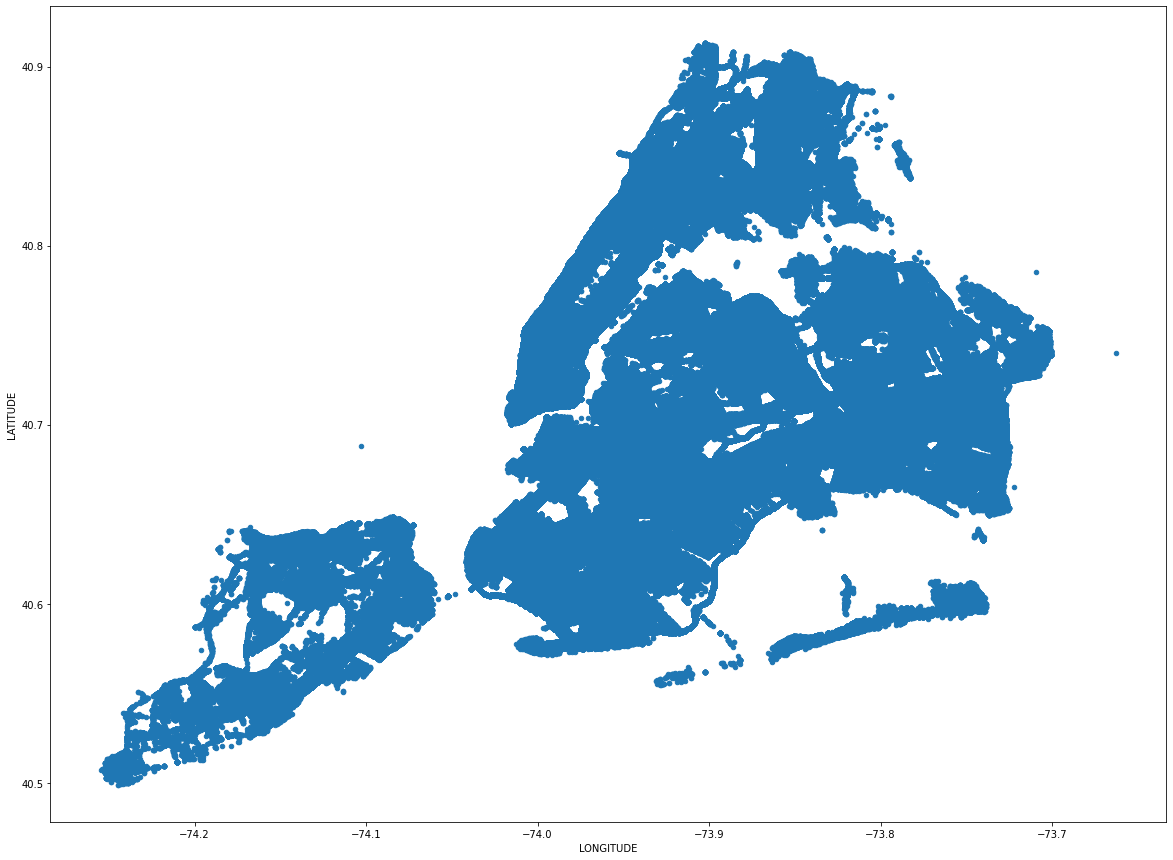

In [27]:
cleandf.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15)) # increasing the figsize a bit

# Overplotting

Although cool, this isn't exactly helpful, because there are just so many datapoints. This is known as "Overplotting."

To get around overplotting, we can sample our data by either specifying the number of points we want to keep, or the percentage of our data set that we want to keep.

## `sample(n= ...)` 

let's us keep a specified number of data points to plot

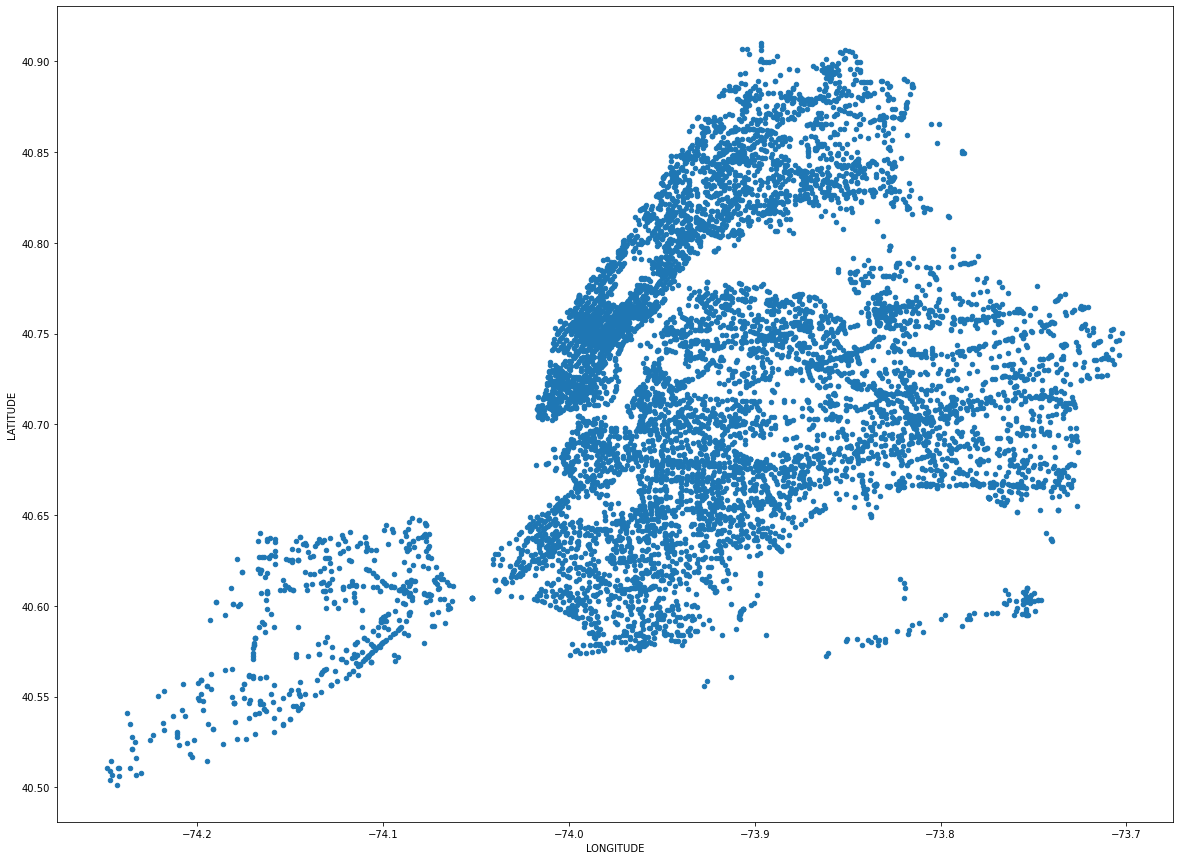

In [28]:
sample = cleandf.sample(n=10000) # keep 10,000 data points

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

## `sample(frac= ...)` 

let's us keep a specified percentage (fraction) of data points to plot

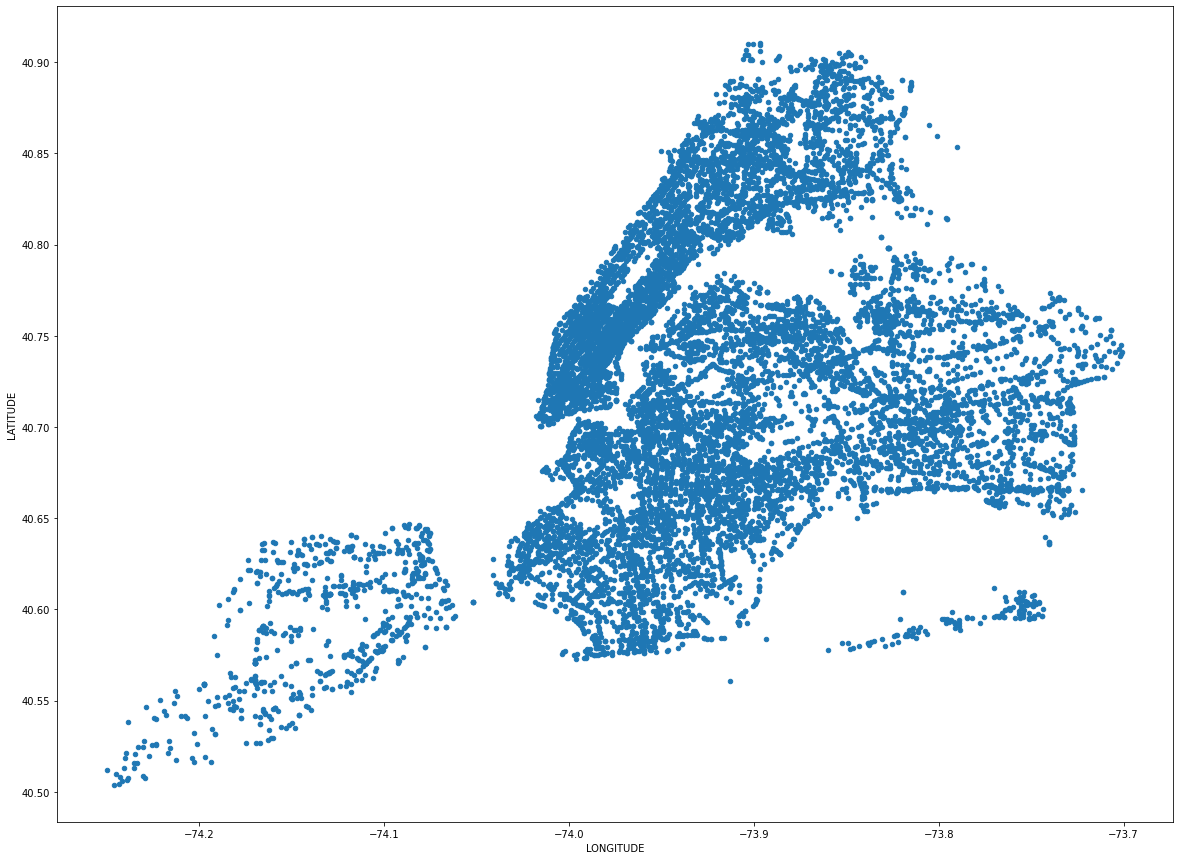

In [29]:
sample = cleandf.sample(frac=0.01) # keep 1% of the dataset

sample.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15))

## `s`

let's us change the marker size

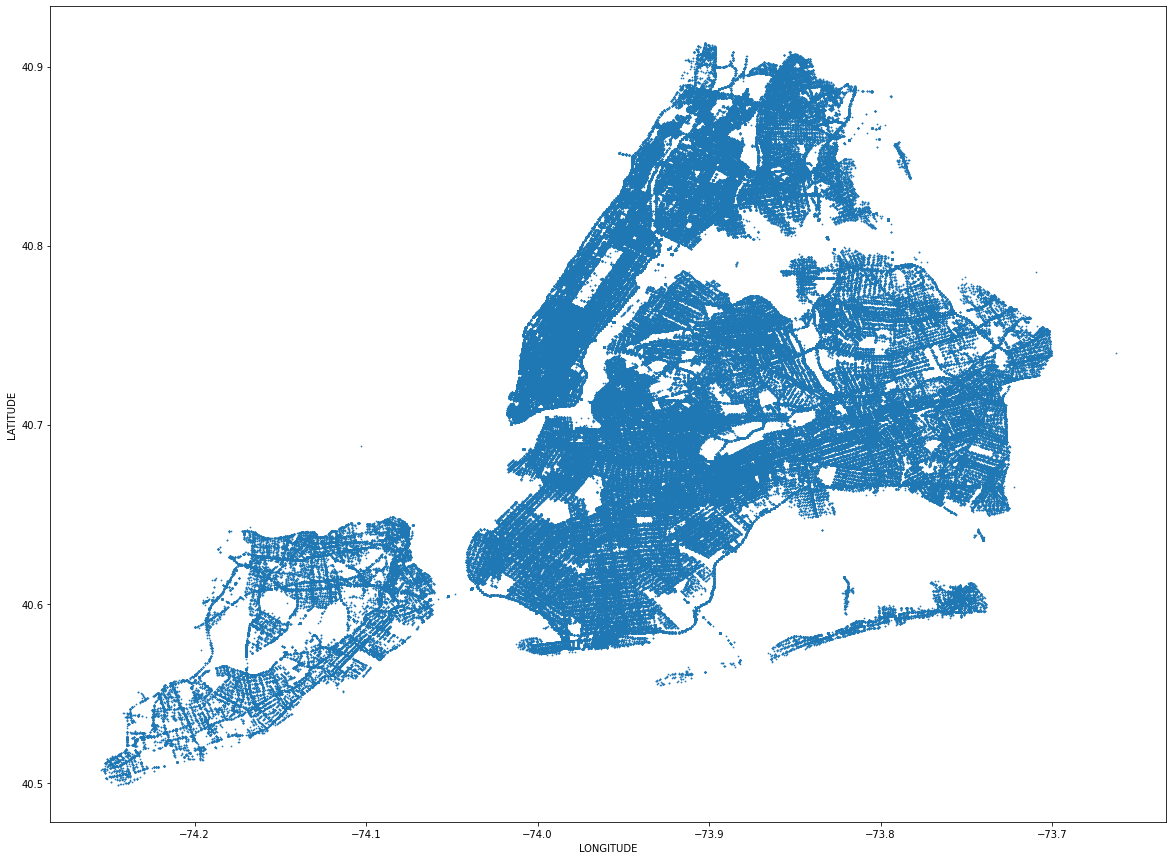

In [30]:
cleandf.plot(
    kind='scatter', x='LONGITUDE', y='LATITUDE', figsize=(20, 15), s=0.5 ) # changing the marker size ('s')

## `alpha`

let's us change the transparency of the marker

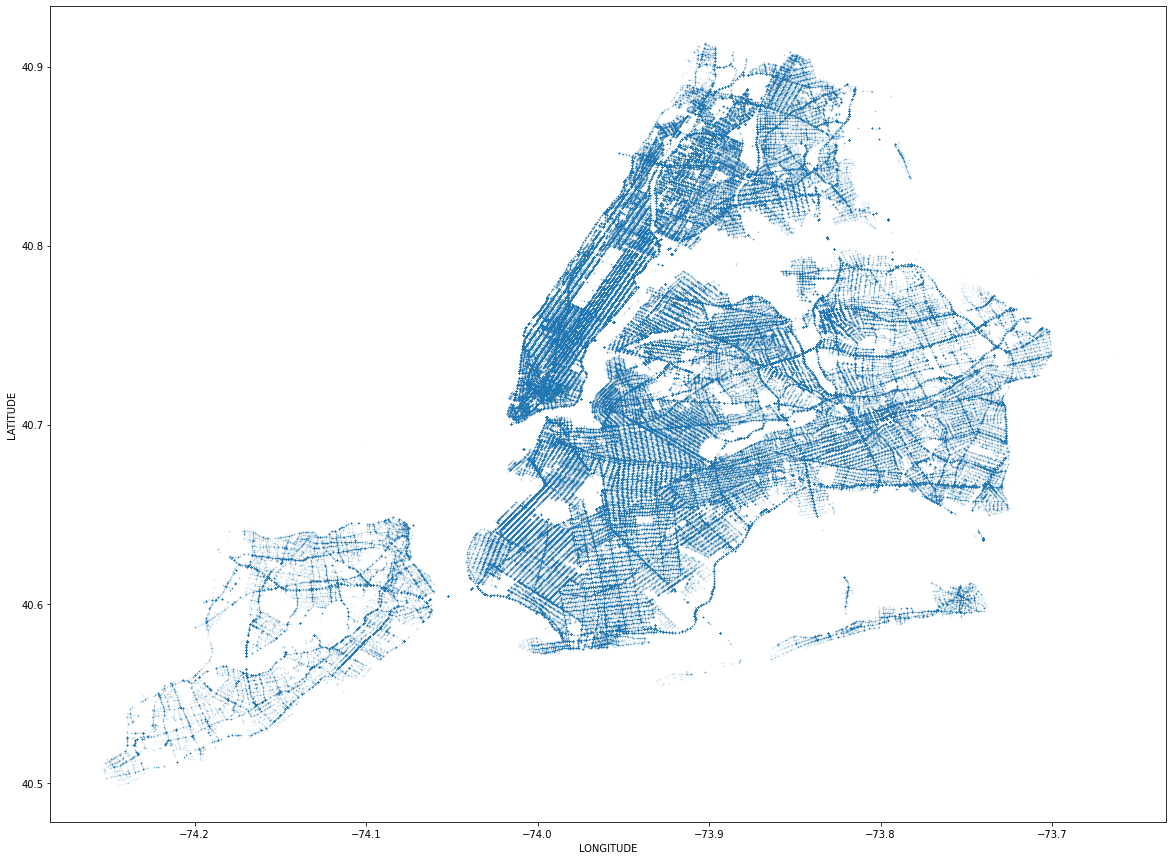

In [31]:
cleandf.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.05) # changing the marker transparency ('alpha')

---

# Datetimes 

Now, back to working with datetimes, in particular, time series data (data that is obtained at successive times, often with equal intervals between them).

Pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the [NumPy](http://www.numpy.org/) `datetime64` and `timedelta64` dtypes, pandas consolidated a large number of features from other Python libraries as well as created a tremendous amount of new functionality for manipulating time series data.

To illustrate, let's generate a list of datetime values for 3 neighboring days starting from `01/30/2017` with the interval equals to one hour. 

The [`date_range`](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.date_range.html) function can return such list in [`DatetimeIndex`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) format. 

We simply should define the left bound for generating dates `start` (`"01/30/2017"` in our case), the right bound for generating dates `end` or the amount of intervals `periods` (`3*24` in our case, because we are going to cover three days) and preferable frequency `freq` (`'H'` in our case)

In [32]:
example_range = pd.date_range(start='01/30/2017', periods=3*24, freq='H')

print("Number of elements:", len(example_range.values))
example_range[:10]

Number of elements: 72


DatetimeIndex(['2017-01-30 00:00:00', '2017-01-30 01:00:00',
               '2017-01-30 02:00:00', '2017-01-30 03:00:00',
               '2017-01-30 04:00:00', '2017-01-30 05:00:00',
               '2017-01-30 06:00:00', '2017-01-30 07:00:00',
               '2017-01-30 08:00:00', '2017-01-30 09:00:00'],
              dtype='datetime64[ns]', freq='H')

## `pd.to_datetime`

To convert a `Series` or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the [`to_datetime`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html) function. When passed a `Series`, this returns a Series (with the same index), while a list-like is converted to a `DatetimeIndex`:

In [33]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-12-10', None])) 

0   2009-07-31
1   2010-12-10
2          NaT
dtype: datetime64[ns]

---

# New Data!

To better illustrate working with datetimes, let's look at the [Daily minimum temperatures in Melbourne data set from Kaggle](https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne) 

You can download this dataset using the "Download" section. 

In [34]:
melbourne_temp = pd.read_csv("./daily-minimum-temperatures-in-melbourne.csv", 
                             skiprows=1,  # let's us skip the header
                             names=["date", "temp"])  # let's name columns as we desire
melbourne_temp

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


Let's drop that final row (the one that appears to just be a description of the data set).

In [35]:
melbourne_temp.drop(melbourne_temp.tail(1).index,inplace=True) 

melbourne_temp.tail()

,date,temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [36]:
melbourne_temp.dtypes

date    object
temp    object
dtype: object

## `to_numeric` 

Along with converting our 'date' column to a datetime dtype, we can also use `pd.to_numeric` to convert the temperatures in our data set to a numeric type. 

In [37]:
melbourne_temp['temp'] = melbourne_temp['temp'].apply(pd.to_numeric, errors="coerce")
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])

In [38]:
melbourne_temp.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = (16, 6) # change figsize 

melbourne_temp.set_index('date', inplace=True)

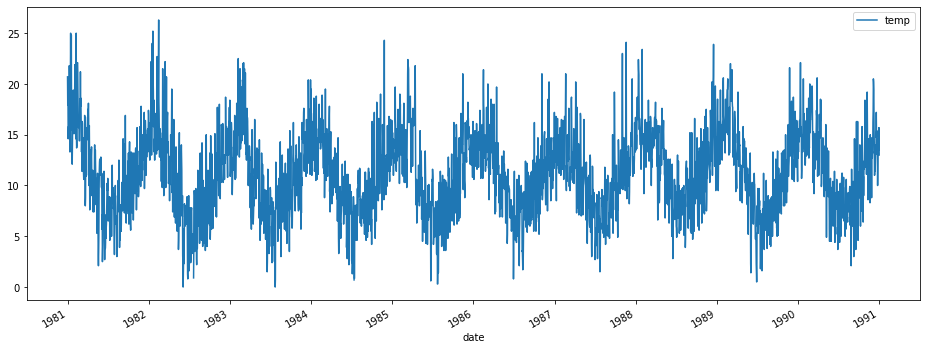

In [40]:
melbourne_temp.plot()
plt.show()

---

# Exercise 1: Find the minimum temperture for all of the recorded history included in this data set:

In [41]:
# your code here

# Solution

In [42]:
melbourne_temp.min()

temp    0.0
dtype: float64

# Exercise 2: Find the temperature for every day in January, 1981:

In [43]:
# your code here

# Solution

In [44]:
melbourne_temp['1981-01']

,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


# Exercise 3: Find the temperature for every day between Jan. 5, 1990 and Jan. 12, 1990:

In [45]:
# your code here

# Solution

In [46]:
melbourne_temp['1990-01-05':'1990-01-12']

,temp
date,
1990-01-05,14.3
1990-01-06,15.3
1990-01-07,16.4
1990-01-08,14.8
1990-01-09,17.4
1990-01-10,18.8
1990-01-11,22.1
1990-01-12,19.0


# Exercise 4: Plot the temperature for every day in February, 1981:

In [47]:
# your code here

# Solution

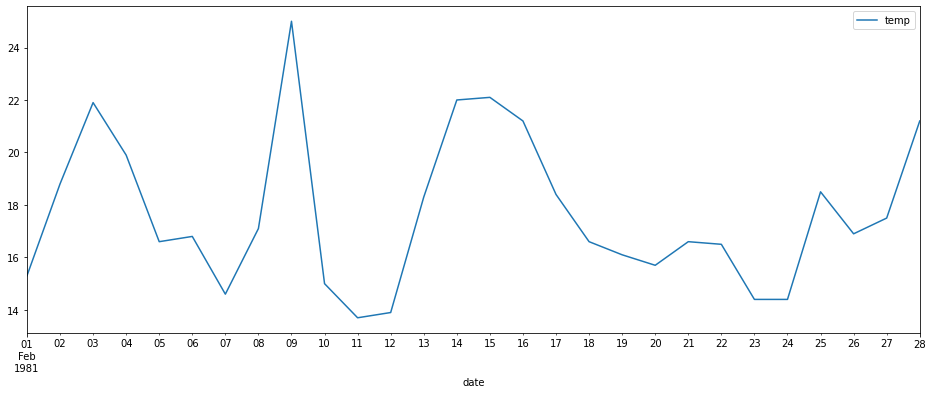

In [48]:
melbourne_temp['1981-02'].plot()
plt.show()

# Exercise 5: Find the average temperature in February, 1981:

In [49]:
# your code here

# Solution

In [50]:
melbourne_temp['1981-02'].mean()

temp    17.678571
dtype: float64

# Exercise 6: Find how many days the temperature was less than 2 degress across the whole data set:

In [51]:
# your code here

# Solution

In [52]:
print("Days with temperature less than 2 degrees:", (melbourne_temp < 2).sum().values[0])

Days with temperature less than 2 degrees: 25


---

# Resampling

Resampling involves changing the frequency of your time series observations. 

- Upsampling means you increase the frequency of the samples (say, from minutes to seconds)
- Downsampling means you decrease the frequency of the samples (say, from months to days)

Imagine we are trying to determine the average weekly temperture from our Melbourne set, for instance. In that case, we would need to upsample the information from daily to weekly. 

In [53]:
melbourne_temp.resample('W').mean().head(10)

,temp
date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429
1981-01-25,15.771429
1981-02-01,16.657143
1981-02-08,17.957143
1981-02-15,18.571429
1981-02-22,17.300000
1981-03-01,17.242857


In [54]:
melbourne_temp.resample('A').min() # 'A' means year-end frequency

,temp
date,
1981-12-31,2.1
1982-12-31,0.0
1983-12-31,0.0
1984-12-31,0.7
1985-12-31,0.3
1986-12-31,0.8
1987-12-31,1.5
1988-12-31,2.8
1989-12-31,0.5


Resampling is also a fast way to smooth in some essence the time series. For instance, the time series of monthly averages has much less peaks or outliers and allows tracking the periodicity. 

One way to smooth a time series is to calculate a rolling average – the average value of the current point and `N` previous points. It can be calcualted using [`rolling`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) pandas's method.

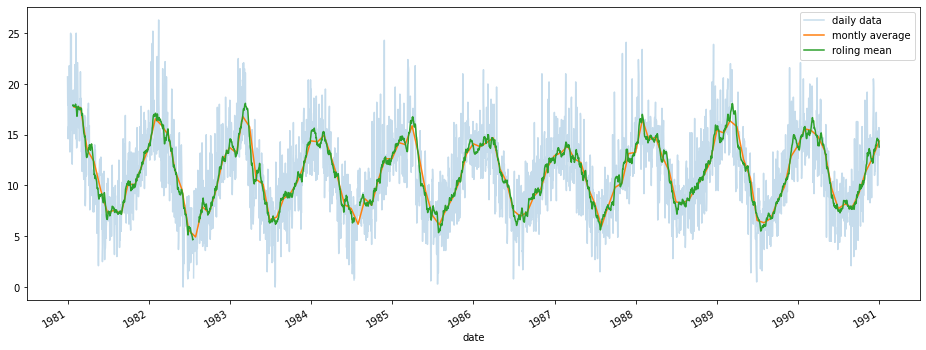

In [55]:
ax = melbourne_temp.plot(alpha=0.25) # draw initial time series and make it transparent

melbourne_temp.resample('M').mean().plot(ax=ax) # draw montly average values

melbourne_temp.rolling(25).mean().plot(ax=ax) # draw roling average that takes into account 25 points

ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

If you set the hourly frequency in the [`resample()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.resample.html) function, then `NaN` values will be created, because there are no more tiny distribution of the temperature.

This is upsampling.

In [56]:
upsampled = melbourne_temp.resample('H').mean()
upsampled.head(30)

,temp
date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,NaN
1981-01-01 02:00:00,NaN
1981-01-01 03:00:00,NaN
1981-01-01 04:00:00,NaN
1981-01-01 05:00:00,NaN
1981-01-01 06:00:00,NaN
1981-01-01 07:00:00,NaN
1981-01-01 08:00:00,NaN


But we can interpolate the missing values at this new frequency.

The `Series` pandas's object provides the [`interpolate`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html) function to interpolate missing values. A good starting point is to use a `linear interpolation`. This draws a straight line between available data and fills in values at the chosen frequency from this line.

In [57]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

,temp
date,
1981-01-01 00:00:00,20.700000
1981-01-01 01:00:00,20.583333
1981-01-01 02:00:00,20.466667
1981-01-01 03:00:00,20.350000
1981-01-01 04:00:00,20.233333
1981-01-01 05:00:00,20.116667
1981-01-01 06:00:00,20.000000
1981-01-01 07:00:00,19.883333
1981-01-01 08:00:00,19.766667
